In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# 晶格相关参数
L = 32
N = 2000

#强化学习相关参数
c = 1       #cost
alpha = 0.05 #学习率
epsilon = 0.10 #随机参数

In [3]:
S = np.random.choice([-1, 1], [L, L])
Q = np.zeros([L, L, 2, 2])  #位置、位置、状态（与大多数状态相同为1,否则为0）、行动（改变为1,不变为0）

In [4]:
# 一次更新过程
def update():
    for x in range(L):
        for y in range(L):
            # 判断属于大多数or少数
            near = S[(x+1)%L, y]+S[(x-1)%L, y]+S[x, (y+1)%L]+S[x, (y-1)%L] #将0也划分为大多数
            if near == 0 : stat = 1
            else : stat = int((np.sign(S[x, y]*near)+1)/2)

            # 选择是否翻转
            if np.random.random() < epsilon :
                action = np.random.choice([1, 0])
                if action == 1 : S[x, y] = -1 * S[x, y]
            else:
                if Q[x, y, stat, 1] < Q[x, y, stat, 0]:
                    S[x, y] = -1 * S[x, y]
                    action = 1
                else: action = 0

            # 更新
            if int((np.sign(S[x, y]*near)+1)/2) == 1 or near == 0 : c = 0
            else: c = 1

            #print(stat, action)
            Q[x, y, stat, action] = Q[x, y, stat, action] + alpha*(c-Q[x, y, stat, action])


100it [01:35,  1.05it/s]


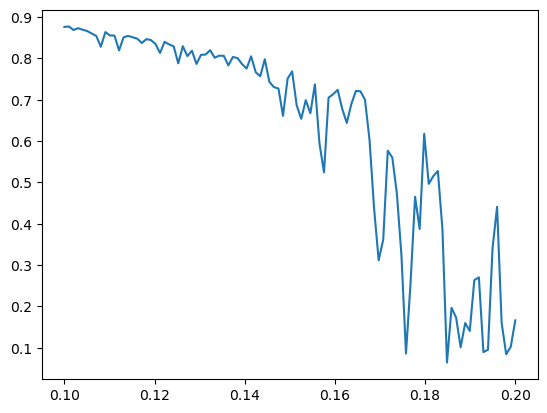

In [5]:
n_epsilon = 100
n_init = 10000
n_sum = 200
n_realize = 1000

epsilon_list = np.linspace(0.20, 0.10, n_epsilon)
M_list = np.zeros(n_epsilon)
for num, epsilon in tqdm(enumerate(epsilon_list)):
    Q = np.zeros([L, L, 2, 2])
    update(n_init)
    for _ in range(n_sum):
        M_list[num] += np.abs(np.sum(S)/L**2)
        update(n_realize)

    M_list[num] = M_list[num]/n_sum


plt.plot(epsilon_list, M_list)
plt.show()
